In [19]:
# Importando as bibliotecas:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [20]:
# Biblioteca para trabalhar com mapas:
!pip install folium

In [4]:
# Carregando a base de dados:
dataset = pd.read_csv('/content/2021-07.csv',sep=';',encoding='utf-8')

In [ ]:
dataset.head().T

,0,1,2,3,4
Região,SE,S,SE,NE,S
UF,ES,RS,SP,MA,RS
Cidade,Cariacica,Esteio,Campinas,Bacabal,Capão da Porteira
Sexo,M,M,F,M,F
Faixa Etária,até 20 anos,entre 21 a 30 anos,entre 31 a 40 anos,entre 31 a 40 anos,mais de 70 anos
Data Finalização,2021-07-01,2021-07-01,2021-07-01,2021-07-01,2021-07-01
Tempo Resposta,15,15,15,NaN,15
Nome Fantasia,Vivo - Telefônica,Oi Fixo,Americanas.com,Mapfre Seguros,Facta Financeira
Segmento de Mercado,"Operadoras de Telecomunicações (Telefonia, Int...","Operadoras de Telecomunicações (Telefonia, Int...",Comércio Eletrônico,"Seguros, Capitalização e Previdência","Bancos, Financeiras e Administradoras de Cartão"
Área,Telecomunicações,Telecomunicações,Demais Produtos,Serviços Financeiros,Serviços Financeiros


### Qual o número de reclamação por Estado?

In [ ]:
pd.DataFrame(dataset.groupby('UF')['UF'].count())

,UF
UF,
AC,31
AL,205
AM,212
AP,14
BA,713
CE,305
DF,475
ES,292
GO,428


### Qual a quantidade de reclamação por sexo?

In [ ]:
pd.DataFrame(dataset[u'Sexo'].value_counts())

,Sexo
M,35130
F,31086
O,31


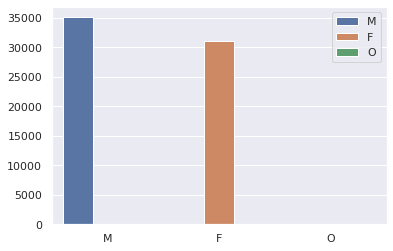

In [ ]:
sns.set(style="darkgrid")
sexo = list(dataset[u'Sexo'].unique())
sexo = list(np.delete(sexo,3))
cont = list(dataset[u'Sexo'].value_counts())
sns.barplot(x=sexo,y=cont,hue=sexo)

### Faixa etária de consumidores por sexo

In [ ]:
pd.DataFrame(dataset.groupby('Sexo')[u'Faixa Etária'].value_counts())

Faixa Etária
Sexo Faixa Etária                    
F    entre 31 a 40 anos          8149
     entre 21 a 30 anos          6562
     entre 41 a 50 anos          5198
     entre 51 a 60 anos          4666
     entre 61 a 70 anos          4391
     mais de 70 anos             1718
     até 20 anos                  401
     entre                          1
M    entre 31 a 40 anos         11621
     entre 21 a 30 anos          8415
     entre 41 a 50 anos          6012
     entre 51 a 60 anos          3568
     entre 61 a 70 anos          3512
     mais de 70 anos             1516
     até 20 anos                  486
O    entre 31 a 40 anos            12
     entre 21 a 30 anos             9
     entre 41 a 50 anos             8
     entre 51 a 60 anos             2

### Consumidores mais jovens contratam serviços pela internet?

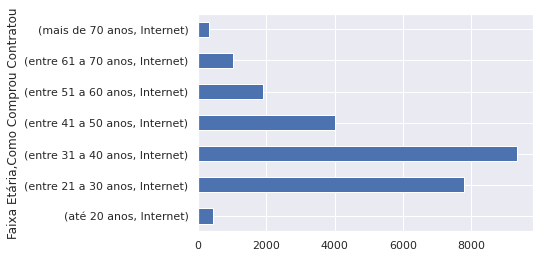

In [ ]:
df2 = dataset[dataset['Como Comprou Contratou']=='Internet']
df2.groupby(u'Faixa Etária')['Como Comprou Contratou'].value_counts().plot.barh()

Essa hipótese não se confirma, consumidores entre 31 e 40 anos são os que mais contrata serviços pela internet

### Estes consumidores procuram a empresa antes de registrar uma reclamação?

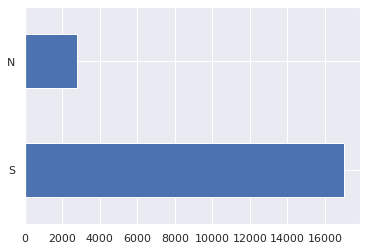

In [ ]:
df2 = dataset[dataset[u'Faixa Etária']=='entre 31 a 40 anos']
df2['Procurou Empresa'].value_counts().plot.barh()

Pelo o que podemos observar a maioria desses consumidores procura primeiro a empresa para tentar solucionar um determinado problema. 

### Qual o grupo de problema mais comum ?

In [ ]:
pd.DataFrame(dataset['Grupo Problema'].value_counts())

,Grupo Problema
Cobrança / Contestação,29404
Contrato / Oferta,12188
Atendimento / SAC,9552
Vício de Qualidade,9373
Informação,2877
Entrega do Produto,2445
Saúde e Segurança,410


 Cobrança / Contestação lidera essa lista de problemas.

Podemos ir mais a fundo e investigar quais são os problemas que estão relacionados a esse grupo.

In [ ]:
pd.DataFrame(dataset[dataset['Grupo Problema'] == u'Cobrança / Contestação'][u'Problema'].value_counts())

,Problema
Cobrança por serviço/produto não contratado / não reconhecido / não solicitado,6200
Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores,5272
Cobrança indevida / abusiva para alterar ou cancelar o contrato,4800
"Cobrança de tarifas, taxas, valores não previstos / não informados",2477
Cobrança em duplicidade / Cobrança referente a pagamento já efetuado,1242
Cobrança após cancelamento do serviço,1162
Renegociação / parcelamento de dívida,884
Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo,805
"Cálculo de juros, saldo devedor (contestação, solicitação de histórico, dúvidas)",769
"Negativação indevida (SPC, Serasa, SCPC etc)",721


### Qual a quantidade de reclamações por segmento de mercado?

In [ ]:
pd.DataFrame(dataset[u'Segmento de Mercado'].value_counts())

,Segmento de Mercado
"Bancos, Financeiras e Administradoras de Cartão",22975
"Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)",13090
Comércio Eletrônico,5045
Transporte Aéreo,3321
Empresas de Pagamento Eletrônico,3025
"Viagens, Turismo e Hospedagem",2394
"Seguros, Capitalização e Previdência",2279
Energia Elétrica,2193
Bancos de Dados e Cadastros de Consumidores,1822
Empresas de Intermediação de Serviços / Negócios,1781


 Os serviços bancários também tem um número de registros de reclamações bem considerável.

Vamos plotar um gráfico com essas informações.

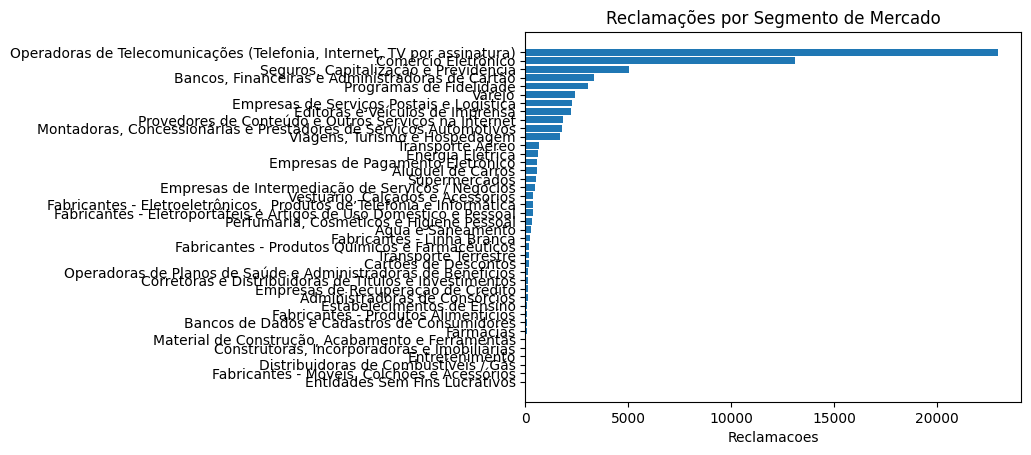

In [ ]:
plt.style.use('ggplot')
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(dataset['Segmento de Mercado'].value_counts()))
values = dataset['Segmento de Mercado'].value_counts()
segmentos = dataset['Segmento de Mercado'].unique()

ax.barh(y_pos, values)
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Reclamações por Segmento de Mercado')

plt.show()

### Top 20 das empresas com mais reclamações

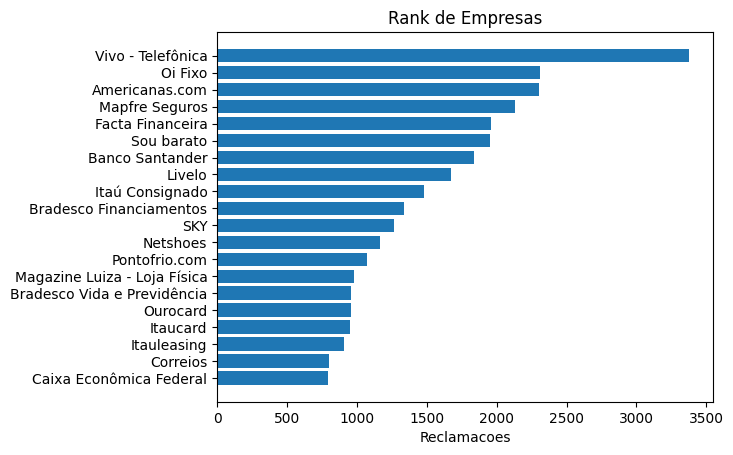

In [ ]:
fig, ax = plt.subplots()

y_pos = np.arange(len(dataset['Nome Fantasia'].value_counts()[:20]))
values = dataset['Nome Fantasia'].value_counts()[:20]
segmentos = dataset['Nome Fantasia'].unique()[:20]

ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Rank de Empresas')

plt.show()

## O tempo de resposta tem alguma correlação com a nota do consumidor?

In [17]:
df = dataset
correlacao = df.corr()
correlacao.style.background_gradient(cmap='coolwarm')

,Tempo Resposta,Nota do Consumidor
Tempo Resposta,1.000000,0.052306
Nota do Consumidor,0.052306,1.000000


 No gráfico esta sendo medindo o grau de correlação entre duas variáveis. Onde 1 indica uma correlação perfeitamente positiva e -1 uma correlação perfeitamente negativa e 0 indica que não existe uma correlação entre essas variáveis.

Nessa base de dados não é possivel confirmar essa hipótese, pois há uma correlação muito fraca. 

## Avaliando as notas dos consumidores

In [28]:
plt.style.use('ggplot')
plt.rcdefaults()

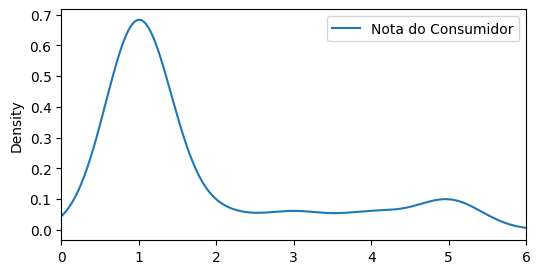

In [29]:
dataset.plot.density(y='Nota do Consumidor', xlim=[0,6], figsize=[6,3])

A maior massa de dados se concentra na nota 1, ou seja a maioria dos clientes não gostou do atendimento.

## Quantos dias a empresa leva para responder o cliente?

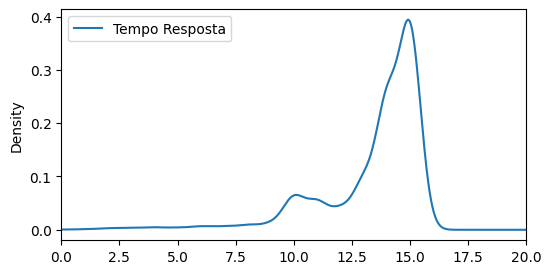

In [27]:
dataset.plot.density(y='Tempo Resposta', xlim=[0,20], figsize=[6,3])

Na grande maioria dos casos as empresas levam 15 dias para atender as solicitações dos seus consumidores

## Proporção de reclamação registradas e não respondidas

In [30]:
x = dataset.groupby(U'Segmento de Mercado')[U'Segmento de Mercado'].count()

# filtrando segmentos com mais de 20 reclamações
x = x[x > 20]

df = dataset[dataset[u'Segmento de Mercado'].isin(x.keys())]
df = df[df[u'Avaliação Reclamação']==u'Não Resolvida']
x1 = df.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()
x1 

Segmento de Mercado
Agua e Saneamento                                                            1
Bancos, Financeiras e Administradoras de Cartão                            170
Comércio Eletrônico                                                         19
Empresas de Intermediação de Serviços / Negócios                             3
Empresas de Pagamento Eletrônico                                             5
Energia Elétrica                                                             7
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática        4
Operadoras de Planos de Saúde e Administradoras de Benefícios                2
Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)     15
Programas de Fidelidade                                                      5
Seguros, Capitalização e Previdência                                         2
Transporte Aéreo                                                            11
Varejo                          

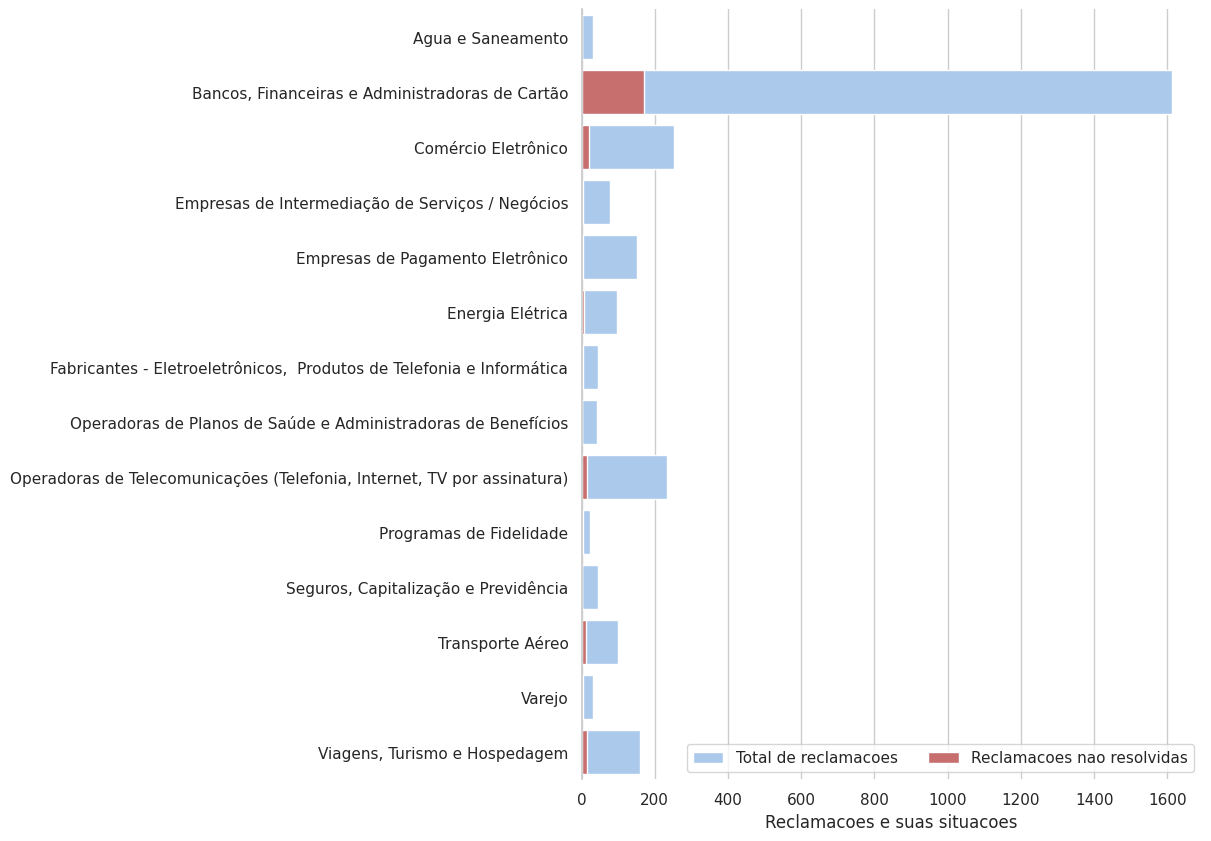

In [31]:
# Gráfico:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 10))

sns.set_color_codes("pastel")
sns.barplot(x=x.values, y=x.keys(), label="Total de reclamacoes", color="b")

sns.set_color_codes("muted")
sns.barplot(x=x1.values, y=x1.keys(),label="Reclamacoes nao resolvidas", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Reclamacoes e suas situacoes")
sns.despine(left=False, bottom=True)

De acordo com o gráfico a quantidade de reclamações não resolvidas é pequena em relação ao total de reclamações para a maioria dos segmentos.

O segmento de Bancos, Financeiras e Administradoras de Cartão tem o maior número de reclamação